**What I want to do: **Play the dogs versus cats competition on kaggle by fine-tuning a pretrained deep learning model, specifically the Vgg16 model.

Step 7 onwards. For Steps 1 to 6, please see the other notebook in the same directory.

## Step7: Rewrite the code taught during lesson 1 in the fastai course for the new dataset

### Admin stuff

In [1]:
%matplotlib inline

In [2]:
path = "data/data_kaggle_dogscats/sample/"
#path = "data/data_kaggle_dogscats/"

In [3]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
from datetime import datetime

Jeremy has created a "utils.py" file with a whole host of convenience utility functions. I need to familiarise this in greater detail, especially the "plots" function. But lets simply use this for now.

In [4]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


### Use the pre-trained VGG model to classify our data

Jeremy has tried to stick to the sklearn import instantiate fit predict paradigm by building a VGG class (I quickly looked online and I think the vgg class is a custom-built class). Let me run this step by step:

In [5]:
# import
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [6]:
# instantiate
vgg = Vgg16()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [7]:
type(vgg)

instance

#### train images in batches 

In [34]:
# define batch size 
# lets keep batch size of 4 so that i can visualise on the screen.
batch_size = 4

In [10]:
batches = vgg.get_batches(path+'train/', batch_size=batch_size)

Found 80 images belonging to 2 classes.


In [12]:
type(batches)

keras.preprocessing.image.DirectoryIterator

In [51]:
imgs,labels = next(batches)

In [52]:
imgs.shape

(4, 3, 224, 224)

In [53]:
imgs

array([[[[ 146.,  147.,  149., ...,  169.,  173.,  175.],
         [ 148.,  148.,  147., ...,  182.,  182.,  181.],
         [ 150.,  149.,  145., ...,  194.,  190.,  185.],
         ..., 
         [ 163.,  162.,  172., ...,   93.,   97.,   99.],
         [ 120.,  126.,  140., ...,   91.,   93.,  100.],
         [ 100.,  109.,  137., ...,   83.,   83.,   96.]],

        [[ 141.,  142.,  144., ...,  158.,  162.,  165.],
         [ 143.,  143.,  142., ...,  171.,  171.,  171.],
         [ 145.,  144.,  140., ...,  182.,  178.,  173.],
         ..., 
         [ 156.,  155.,  165., ...,   88.,   92.,   94.],
         [ 113.,  119.,  133., ...,   84.,   86.,   93.],
         [  92.,  101.,  129., ...,   76.,   76.,   89.]],

        [[ 138.,  139.,  141., ...,  164.,  166.,  166.],
         [ 140.,  140.,  139., ...,  177.,  175.,  172.],
         [ 142.,  141.,  137., ...,  186.,  180.,  175.],
         ..., 
         [ 150.,  149.,  159., ...,   84.,   88.,   90.],
         [ 107.,  113.,

In [54]:
labels

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]], dtype=float32)

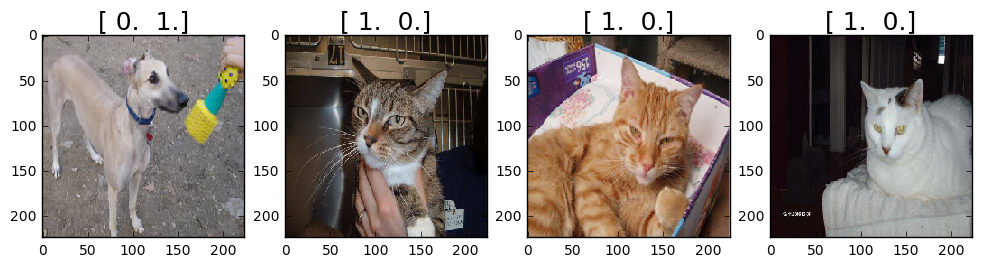

In [55]:
plots(imgs,titles=labels)

In [56]:
vgg.predict(imgs=imgs,details=True)

(array([ 0.7517,  0.6052,  0.6777,  0.8637], dtype=float32),
 array([172, 281, 282, 285]),
 [u'whippet', u'tabby', u'tiger_cat', u'Egyptian_cat'])

How many classes are there in the vgg pre-trained model?

In [58]:
len(vgg.classes)

1000

In [59]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

In [60]:
vgg.classes[996:]

[u'hen-of-the-woods', u'bolete', u'ear', u'toilet_tissue']

Interesting to see 'ear' and 'toilet tissue' as some of the classes. Imagenet has 32000 classes though. looks like there is no super-classification to the VGG16 classes. You can get more info about VGG from their page [here](http://www.robots.ox.ac.uk/~vgg/research/very_deep/). 

### run the model on the sample

In [8]:
path = "data/data_kaggle_dogscats/sample/"
batch_size = 64

In [9]:
# start logging time to execute
starttime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print ("start time:",starttime)

batches = vgg.get_batches(path+"train/",batch_size=batch_size)
val_batches = vgg.get_batches(path+"valid/",batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches,val_batches,nb_epoch=5)

# log time for when the process ends
endtime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

print("finish time:",endtime)
print ("timedelta = ", datetime.strptime(endtime,'%Y-%m-%d %H:%M:%S') - datetime.strptime(starttime,'%Y-%m-%d %H:%M:%S'))

start time: 2017-02-06 10:32:00
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/5
80/80 [==============================] - 3s - loss: 1.3338 - acc: 0.5875 - val_loss: 0.4749 - val_acc: 0.7500
Epoch 2/5
80/80 [==============================] - 2s - loss: 0.3940 - acc: 0.8750 - val_loss: 0.7510 - val_acc: 0.7500
Epoch 3/5
80/80 [==============================] - 2s - loss: 0.1625 - acc: 0.9625 - val_loss: 0.9757 - val_acc: 0.7500
Epoch 4/5
80/80 [==============================] - 2s - loss: 0.1524 - acc: 0.9625 - val_loss: 1.0605 - val_acc: 0.7500
Epoch 5/5
80/80 [==============================] - 2s - loss: 0.2083 - acc: 0.9500 - val_loss: 0.9722 - val_acc: 0.7500
finish time: 2017-02-06 10:32:25
timedelta =  0:00:25


Clearly, diminishing returns after 3 epochs on the sample dataset. Let's train on the main dataset. Will stick to 5 epochs 

### running the model on the overall train data

In [11]:
path = "data/data_kaggle_dogscats/"
batch_size = 64

In [ ]:
# start logging time to execute
starttime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print ("start time:",starttime)

batches = vgg.get_batches(path+"train/",batch_size=batch_size)
val_batches = vgg.get_batches(path+"valid/",batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches,val_batches,nb_epoch=5)

# log time for when the process ends
endtime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

print("finish time:",endtime)
print ("timedelta = ", datetime.strptime(endtime,'%Y-%m-%d %H:%M:%S') - datetime.strptime(starttime,'%Y-%m-%d %H:%M:%S'))

start time: 2017-02-05 08:46:33
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/5
20000/20000 [==============================] - 593s - loss: 0.2074 - acc: 0.9582 - val_loss: 0.0814 - val_acc: 0.9810
Epoch 2/5
20000/20000 [==============================] - 595s - loss: 0.1777 - acc: 0.9677 - val_loss: 0.0789 - val_acc: 0.9824
Epoch 3/5
20000/20000 [==============================] - 602s - loss: 0.1785 - acc: 0.9705 - val_loss: 0.0702 - val_acc: 0.9846
Epoch 4/5
20000/20000 [==============================] - 602s - loss: 0.1899 - acc: 0.9701 - val_loss: 0.1045 - val_acc: 0.9806
Epoch 5/5
14080/20000 [====================>.........] - ETA: 142s - loss: 0.1738 - acc: 0.9730

Each epoch is taking 10 minutes. Based on the slope of the val_acc we can know how many epochs to run. Notice that val_acc is decreasing in iteration 4. So nb_epoch=3 is optimal. Next, come up with a function to predict the test set data in the format that kaggle accepts.

### come up with a strategy of how to predict test set data based on fine-tuned model

In [12]:
path = "data/data_kaggle_dogscats/"

In [15]:
batches, predict = vgg.test(path+"test/")

Found 0 images belonging to 0 classes.


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda2/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/engine/training.py", line 409, in data_generator_task
    generator_output = next(generator)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 682, in next
    index_array, current_index, current_batch_size = next(self.index_generator)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py", line 507, in _flow_index
    current_index = (self.batch_index * batch_size) % N
ZeroDivisionError: integer division or modulo by zero



The above is happening because the vgg.test function expects the images in test to actually be under some particular class similar to what it expected in the training set. This is obviously an issue but aim to fix it sometime later. For now, simply move the test images to a folder within test

**Convert this piece of markdown into code to execute the commands**

%mkdir data/data_kaggle_dogscats/test/blah/


%mv data/data_kaggle_dogscats/test/*.jpg data/data_kaggle_dogscats/test/blah/

In [18]:
batches, predict_proba = vgg.test(path+"test/")

Found 12500 images belonging to 1 classes.


In [19]:
type(batches)

keras.preprocessing.image.DirectoryIterator

In [20]:
type(predict_proba)

numpy.ndarray

In [22]:
predict_proba.shape

(12500, 2)

In [23]:
predict_proba[:5]

array([[  1.0000e+00,   1.2358e-08],
       [  4.7360e-02,   9.5264e-01],
       [  1.0000e+00,   2.6625e-07],
       [  1.0000e+00,   9.0740e-12],
       [  1.8256e-02,   9.8174e-01]], dtype=float32)